In [7]:
import pickle
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
from collections import Counter
import nltk
% matplotlib inline

In [146]:

# Download Data
raw_republica = pd.read_pickle('news_dfs/la_republica_final_df.pkl')

# Get rid of September
republica = raw_republica[(raw_republica.year == 2016) & (raw_republica.month != 9)]

# Topic Modeling

In [165]:
# Spanish Stop Words
stopwords = nltk.corpus.stopwords.words('spanish')

In [200]:
# Vectorize Data
tfidf_vectorizer = TfidfVectorizer(max_df = 0.4, min_df = 15,
                                   stop_words = stopwords)
tfidf = tfidf_vectorizer.fit_transform(republica.article)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# NMF
nmf = NMF(n_components = 40, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

In [201]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:" + str(int(topic_idx)+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [202]:
transformed_data = nmf.transform(tfidf)
len(transformed_data)

3879

In [ ]:
# Top Words Per Topic

In [203]:
print_top_words(nmf, tfidf_feature_names, 20)

Topic:1
anos facebook mujer segun ser joven habia luego hombre dos si vida tras sido personas dijo tambien solo despues puede
Topic:2
rousseff temer dilma juicio politico senado presidenta proceso brasil destitucion diputados camara michel cargo mandataria gobierno cunha presidente si brasileno
Topic:3
trump clinton sanders donald democrata hillary republicano partido delegados primarias candidato campana senador bernie nominacion magnate republicanos convencion elecciones presidencial
Topic:4
maduro venezuela nicolas oposicion revocatorio referendo nacional capriles electoral firmas presidente gobierno venezolano asamblea pais ramos cne mud opositora caracas
Topic:5
siria alepo sirio observatorio bombardeos humanos rebeldes derechos guerra fuerzas damasco regimen ataques onu rusia ciudad humanitaria bombardeo civiles bashar
Topic:6
youtube video imagenes ve hombre muestra usuarios observa conductor vehiculo escena reproducciones hecho auto mujer subido viral grabacion clip luego
Topic

# Labels for Each Topic

In [2]:
topics = {1:'other', 2:'Brazil Corruption 1',
         3:'U.S. Presidential Election',4:'Venezuela: Presidential Opposition',
          5: 'Syria', 6: 'Youtube: Popular Videos',
          7: 'facebook tags', 8: 'El Chapo',
          9: 'Bolivia Presidential Term Referendum', 10: "Obama",
          11: 'Ecuador Earthquake', 12: 'Pope Francis',
          13: 'Brexit', 14: 'Zika',
          15: 'Spanish Presidential Elections', 16: "Brussels Bombings",
          17: 'Twitter', 18: 'North Korea',
          19: 'Turkey Coup', 20: 'Brazil Corruption 2',
          21: 'Chile-Bolivia Disputes', 22: 'Colombia FARC Peace Agreement',
          23: 'Syrian Immigration Crisis', 24: 'Topic: Familial Tragedy',
          25: 'Argentina: Money Laundering Scandal', 26: "U.S. Dallas Shooting",
         27: 'Bolivian Presidential Scandal', 28: 'Venezuelan OAS Investigation', 
         29: 'Education', 30: 'Venezuelan Presidential Opposition',
         31: 'EgyptAir Crach', 32: 'Rio Olympics',
         33: 'Capture of Colombian Reporter', 34: 'Topic: Science',
         35: 'Pokemon Go' , 36: 'Argentina: Presidential Tax Evasion', 
         37: 'ISIS' , 38: 'Topic: Money', 
         39: 'Cuba', 40: 'U.S. Orlando Shooting'}

## Cleaning Data

In [444]:
# Final Data is By_Month
final_data = pd.DataFrame(transformed_data).applymap(lambda x: 1 if x>.12 else 0)
final_data.columns = topics.values()
final_data['month'] = republica.month
by_month = final_data.groupby('month').sum()

for i in range(8):
    by_month.iloc[i] = by_month.iloc[i]/float(np.sum(by_month.iloc[i]))
    
by_month['Brazil Corruption'] = by_month['Brazil Corruption 1'] + by_month['Brazil Corruption 2']
del by_month['Brazil Corruption 1']
del by_month["Brazil Corruption 2"]

In [ ]:
by_month.to_pickle('republica_month.pkl')

# Top Topics per Month

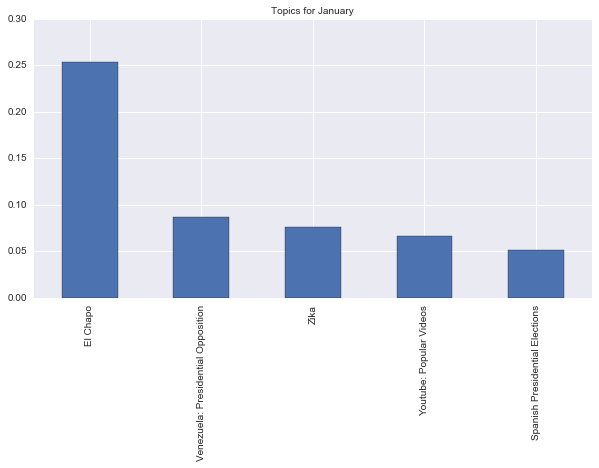

In [31]:
rc={'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelsize': 25, 'font.size': 10, 'legend.fontsize': 30.0, 'axes.titlesize': 10, "figure.figsize": [10, 5]}
sns.set(rc = rc)
# El Chapo
# Venezuelan Presidential Opposition
by_month.iloc[0].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for January')

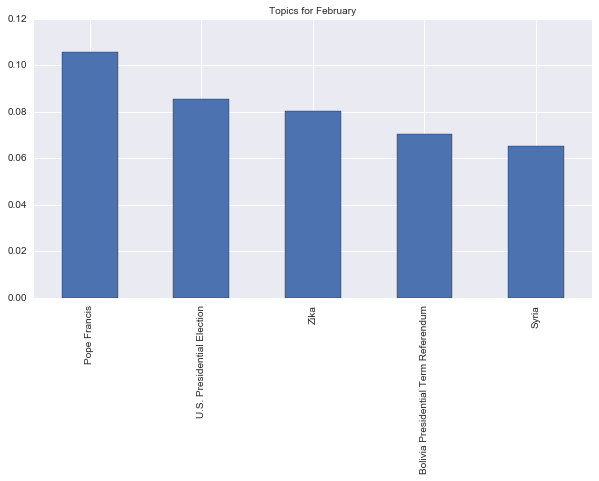

In [32]:
# Pope Francis
# U.S. Presidential Election
by_month.iloc[1].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for February')

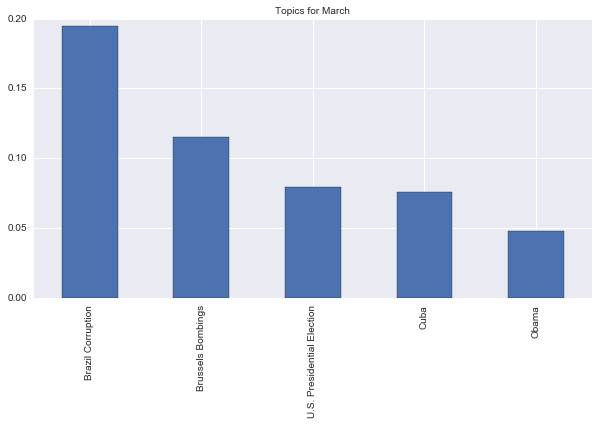

In [33]:
# Brazilian Corruption
# Brussels Bombins
by_month.iloc[2].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for March')

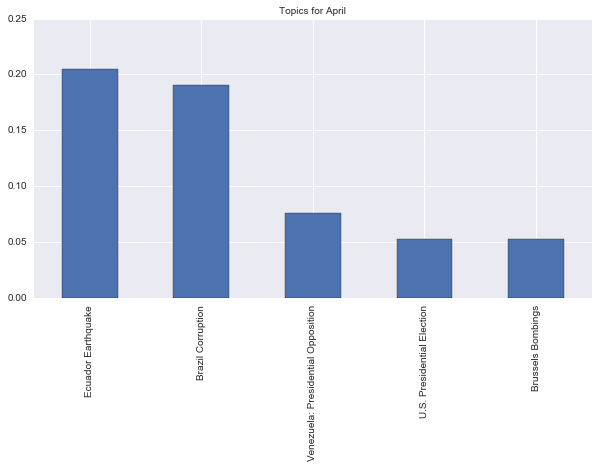

In [34]:
# Ecuadorian Earthquake
# Brazilian Corruption
by_month.iloc[3].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for April')

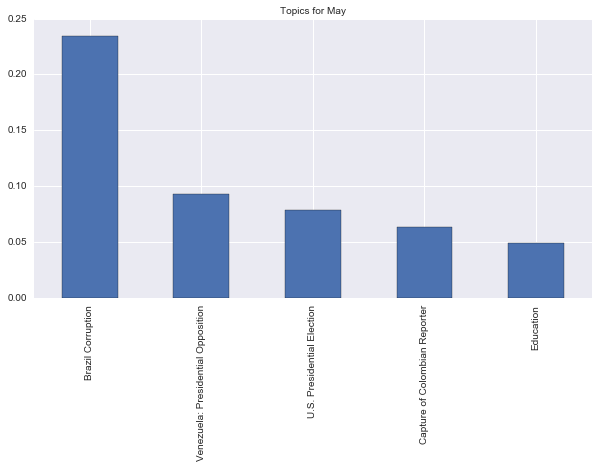

In [35]:
# Brazilian Corruption
# Venezuelan Presidential Opposition
by_month.iloc[4].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for May')

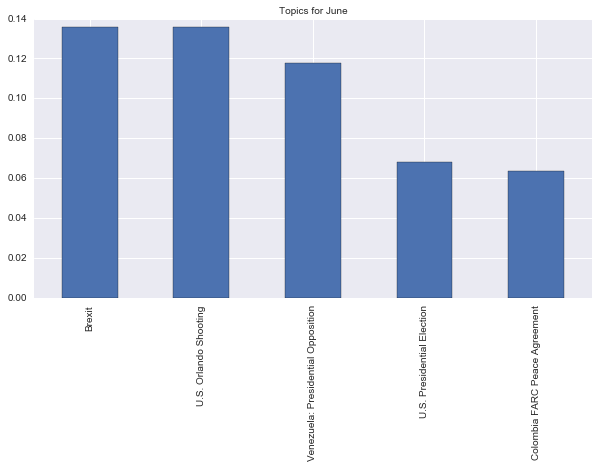

In [36]:
# Brexit
# U.S. Orlando Shooting
by_month.iloc[5].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for June')

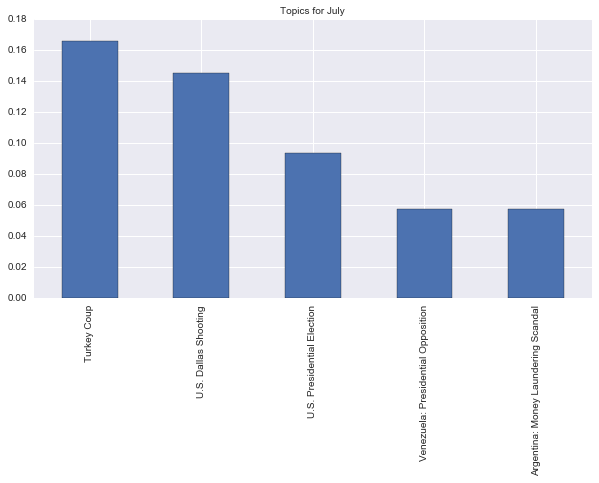

In [37]:
# Turkish Coup
# U.S. Dallas Shooting
by_month.iloc[6].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for July')

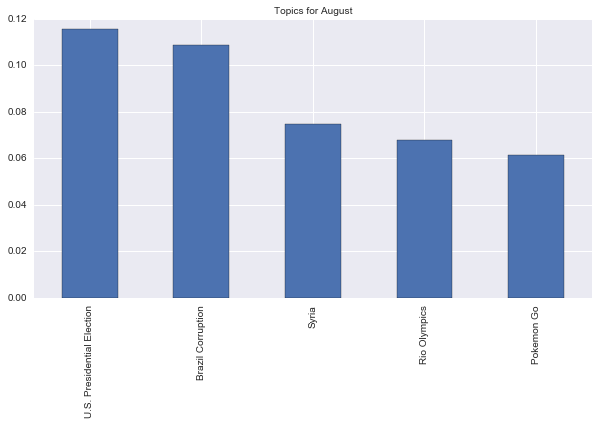

In [38]:
# U.S. Presidential Election
# Brazilian Corruption Scandal
by_month.iloc[7].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for August')

# Top Topics for the Year

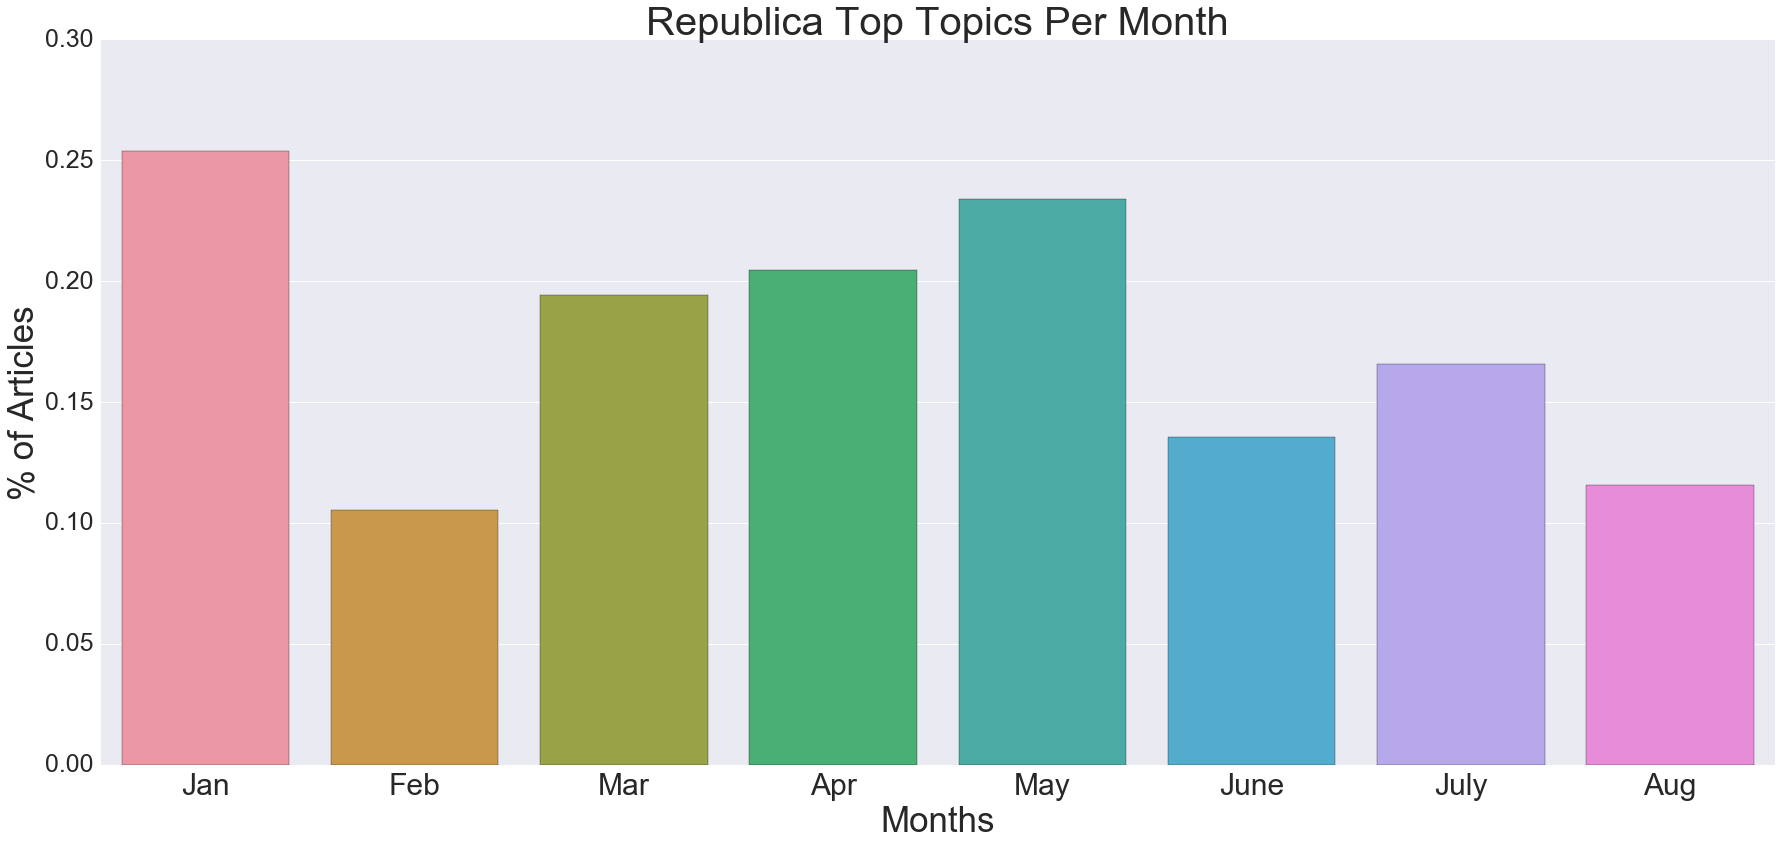

In [39]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "June", "July", "Aug"]

lst = []
topics_ =[]
for i in range(8):
    x = by_month.iloc[i].sort_values(ascending = False).head(1)
    lst.append(x[0])
    topics_.append(x.keys()[0])
rc={'xtick.labelsize': 30, 'ytick.labelsize': 25, 'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 30.0, 'axes.titlesize': 20, "figure.figsize": [30, 13]}
sns.set(rc = rc)
sns.barplot(x = months, y = lst)
plt.title('Republica Top Topics Per Month', fontsize=40)
plt.xlabel('Months', fontsize=35)
_ = plt.ylabel('% of Articles', fontsize=35)

In [40]:
topics_

['El Chapo',
 'Pope Francis',
 'Brazil Corruption',
 'Ecuador Earthquake',
 'Brazil Corruption',
 'Brexit',
 'Turkey Coup',
 'U.S. Presidential Election']